In [1]:
import sys
sys.path.insert(0, "../lib")


In [2]:
from Segmentation import segmentation
import tensorflow as tf
import segmentation_models as sm
import numpy as np
import matplotlib.pyplot as plt

print(sm.__version__)
print(tf.__version__)#needs to be 2.2 (+)
import warnings
warnings.filterwarnings("ignore")

Segmentation Models: using `tf.keras` framework.
1.0.1
2.2.0


In [3]:
#PATH to your datafolder
PATH ='../data/image_and_masks/'
#LABELS of your segmentation task
LABELS=['background','cell1','cell2']

In order to use that method your directory Structre should be as follow :


PATH=path/to/folder/


        .train_imgs//
                        .train//
                               image1
                               image2
                               ...
        .train_mask//
                        .train//
                               mask1
                               mask2
                               ...
                               
                               
        .val_imgs//
                        .val//
                               image1
                               image2
                               ...
        .val_mask//
                        .val//
                               mask1
                               mask2
                               ...
                               
        .test_imgs//
                        .test//
                               image1
                               image2
                               ...                               
                               

# 2 Ways to use the segmentation Class
## 1. Use the user-friendly prompt
## 2. Use the params input

## 1. Use the user-friendly prompt

This option was created for beginner users so that they can train their model without having one line to code. It is easy to use. You just need to answer the questions on the prompt as you'll see below

In [ ]:
seg_interactive = segmentation(PATH,LABELS)

## 2. Use the params input

This option was created for more advanced users so that directly use the methods inside the segmentation class : List of all useful methods to be used :

* train()
* plot_history() : to plot the loss history of your training and validation set
* create_augmentation_pipeline() : create the albumentation augmentation pipeline : if you need specific augmentation, go in the class and tweak that function to have an appropriate augmentation pipeline
* show_predictions() : to compare the predictions of our model with the ground truth 
* predict_unlabeled() : to predict the mask of unlabeled images you have in the test_imgs folder


Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


/Users/williampalmer/anaconda3/envs/envnlp/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '



 Starting Training 

Epoch 1/30
10/10 [==============================] - 17s 2s/step - loss: 0.9311 - accuracy: 0.7147 - iou_score: 0.1594 - val_loss: 1.4675 - val_accuracy: 0.0064 - val_iou_score: 0.1604
Epoch 2/30
10/10 [==============================] - 17s 2s/step - loss: 0.6997 - accuracy: 0.9212 - iou_score: 0.2264 - val_loss: 1.4057 - val_accuracy: 0.0663 - val_iou_score: 0.0260
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.6173 - accuracy: 0.9494 - iou_score: 0.2686 - val_loss: 0.7807 - val_accuracy: 0.7452 - val_iou_score: 0.0864
Epoch 4/30
10/10 [==============================] - 17s 2s/step - loss: 0.5958 - accuracy: 0.9519 - iou_score: 0.2626 - val_loss: 0.6306 - val_accuracy: 0.9351 - val_iou_score: 0.2598
Epoch 5/30
10/10 [==============================] - 16s 2s/step - loss: 0.5953 - accuracy: 0.9406 - iou_score: 0.2589 - val_loss: 0.6163 - val_accuracy: 0.9544 - val_iou_score: 0.2682
Epoch 6/30
10/10 [==============================] - 15s 2s

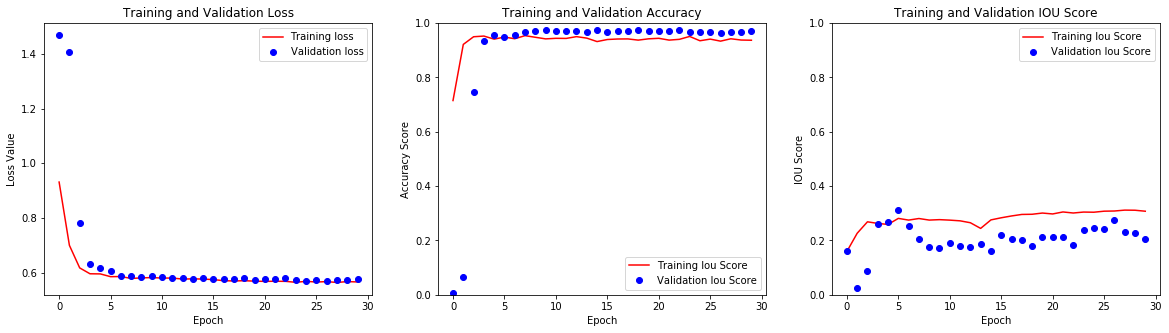


 What do you want to do now ? 
 -'save_model' 
 -'plot_history' 
 -'show_predictions' 
 -'continue_training' 
 -'predict_on_new_data' 
 -'end' 
show_predictions


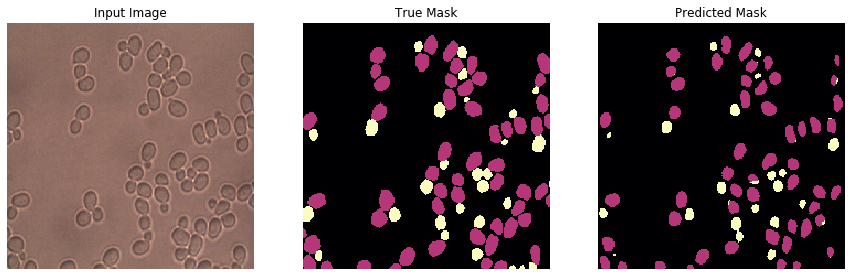

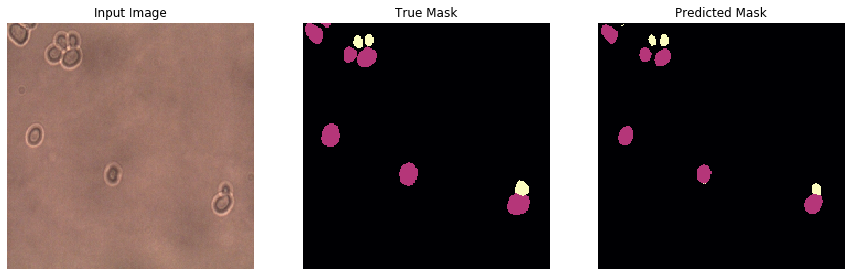

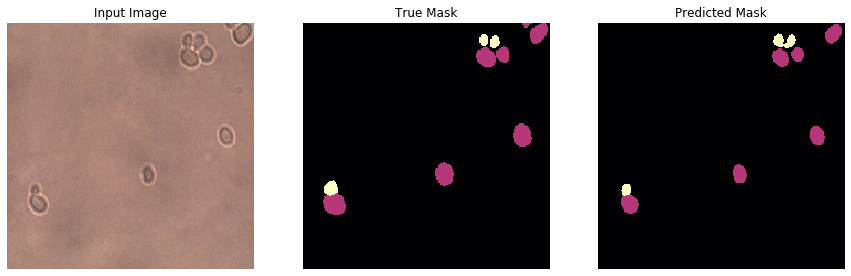


 What do you want to do now ? 
 -'save_model' 
 -'plot_history' 
 -'show_predictions' 
 -'continue_training' 
 -'predict_on_new_data' 
 -'end' 
end


In [5]:
params={'backbone':'mobilenet',
        'loss':[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
        'weights':[1],
        'augmentation': True,
        'weights_pretrained':'imagenet',
        'batch_size':10,
        'steps_per_epoch':10,
        'n_epochs':30,
        'encoder_freeze': False}
seg=segmentation(PATH,LABELS,params=params)

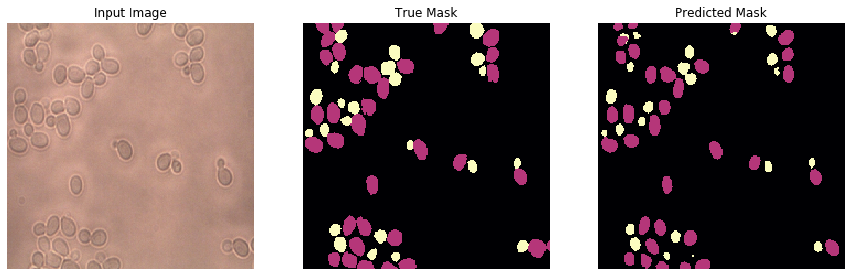

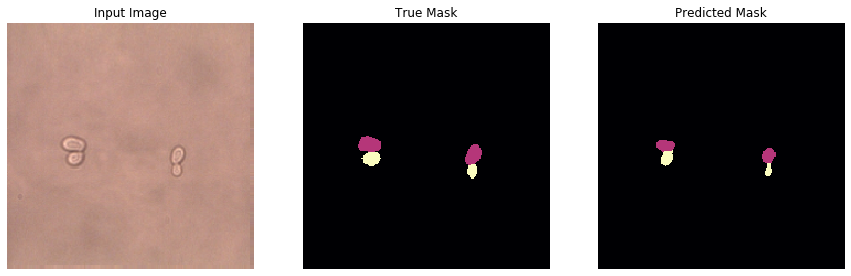

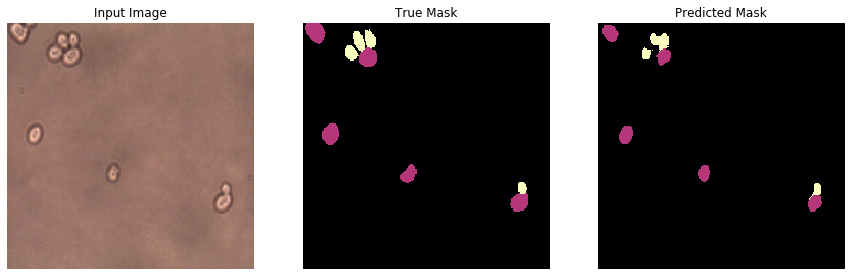

In [6]:
seg.show_predictions()

In [12]:
#Label unlabeled imgs
#seg.predict_unlabeled()